# Week 9 Prac
About The Data
We'll be using the Breast Cancer Wisconsin (Diagnostic) Data Set from kaggle for this lab, but feel free to follow along with your
own dataset. The dataset contains a total of 32 columns, with following attribute information:
1) ID number
2) Diagnosis (M = malignant, B = benign)
3‑32)
Ten real‑valued features are computed for each cell nucleus:
a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray‑scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area ‑ 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" ‑ 1)
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each
image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
Our goal will be to predict the diagnosis (benign or malignant).

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')
from sklearn import datasets

In [113]:
breast_cancer_df = pd.read_csv('data.csv')
breast_cancer_df.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

### Different example

In [114]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df.head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                5.1               3.5  ...               0.2   setosa
1                4.9               3.0  ...               0.2   setosa
2                4.7               3.2  ...               0.2   setosa
3                4.6               3.1  ...               0.2   setosa
4                5.0               3.6  ...               0.2   setosa

[5 rows x 5 columns]

In [115]:
breast_cancer_df.drop(labels=['Unnamed: 32', 'id'], axis=1, inplace=True)

In [116]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Different example

In [117]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


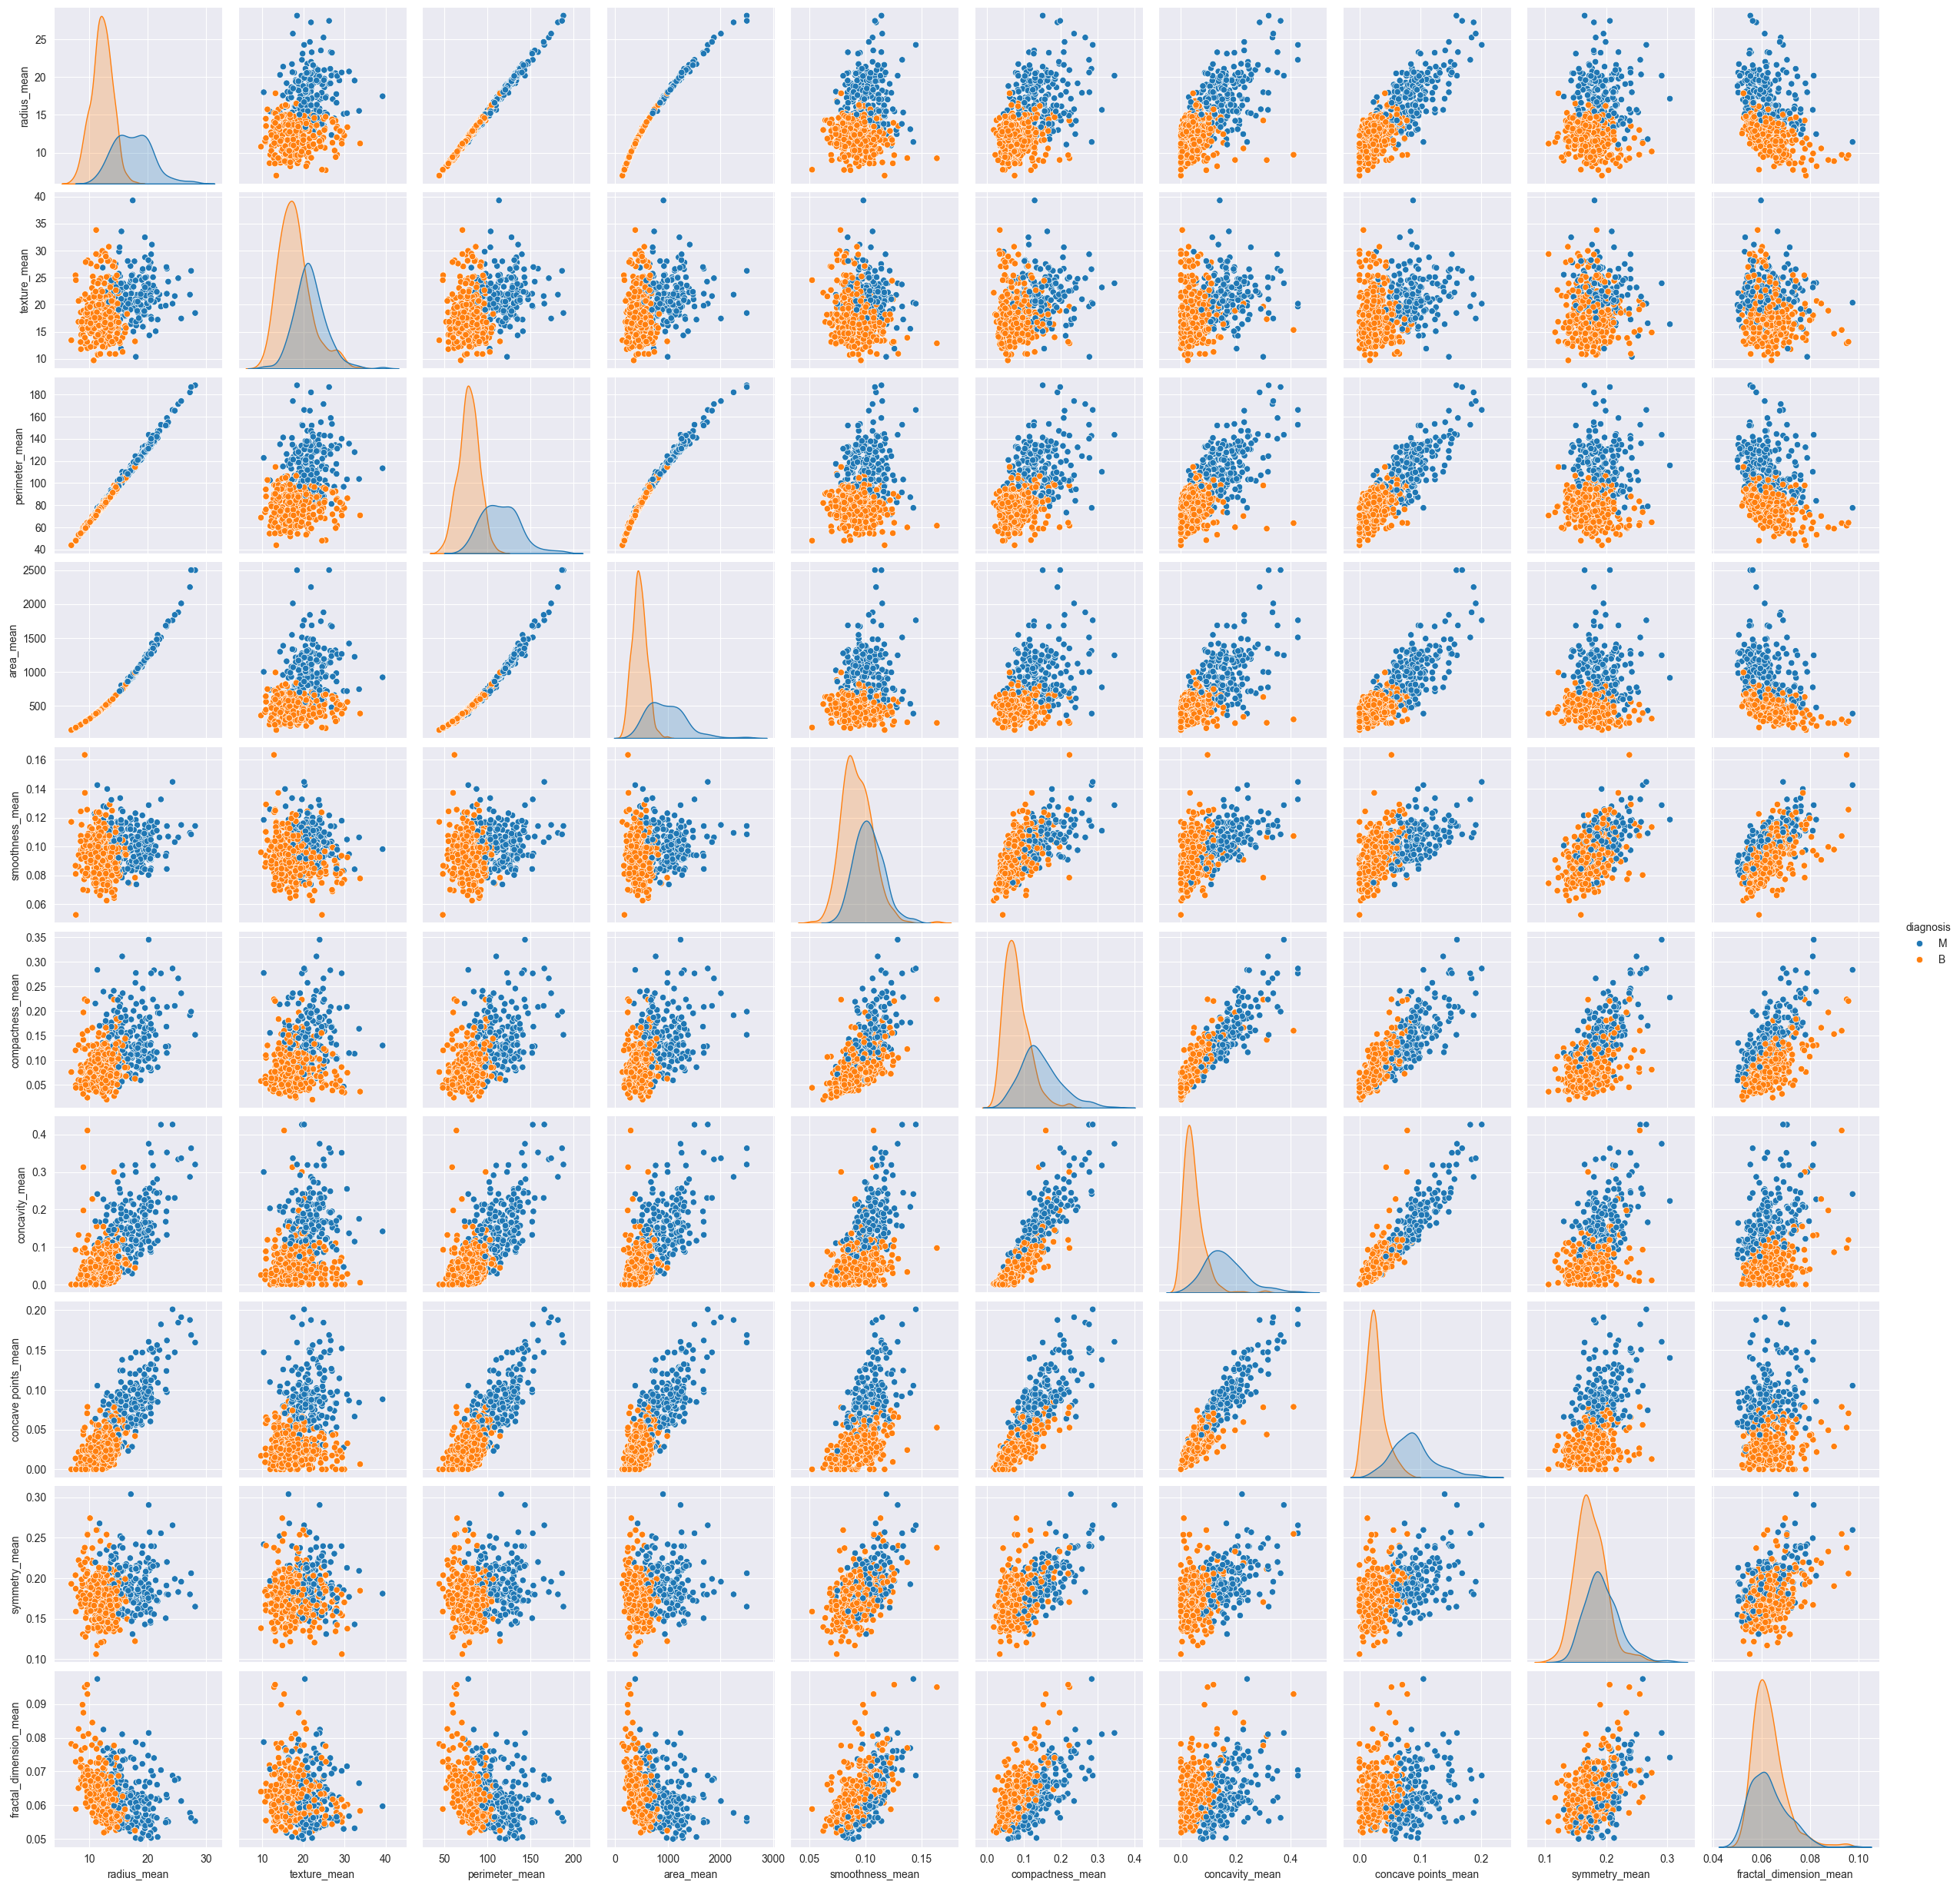

In [118]:
sns.pairplot(breast_cancer_df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
'smoothness_mean', 'compactness_mean', 'concavity_mean',
'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])
plt.show()

### Different example

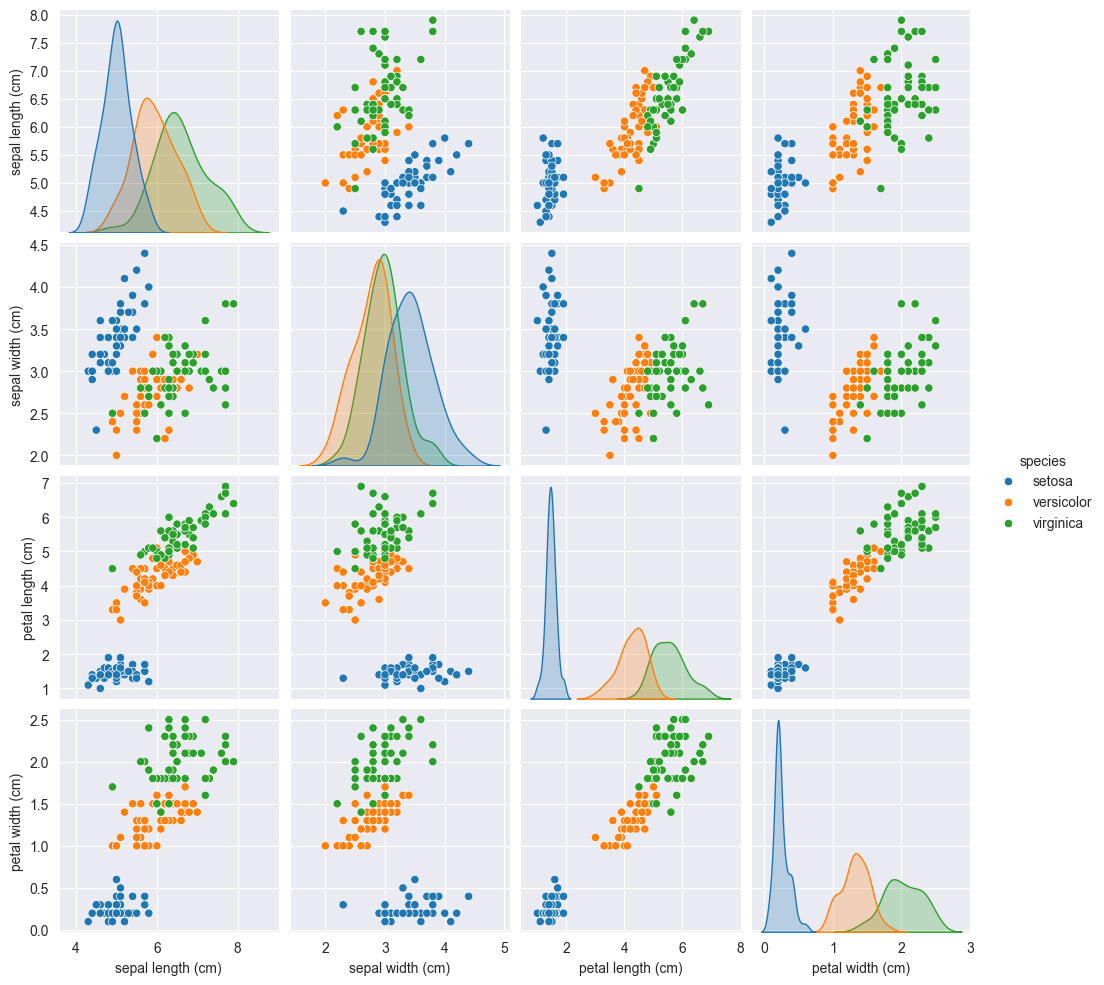

In [119]:
sns.pairplot(iris_df, hue='species', vars=iris.feature_names)
plt.show()

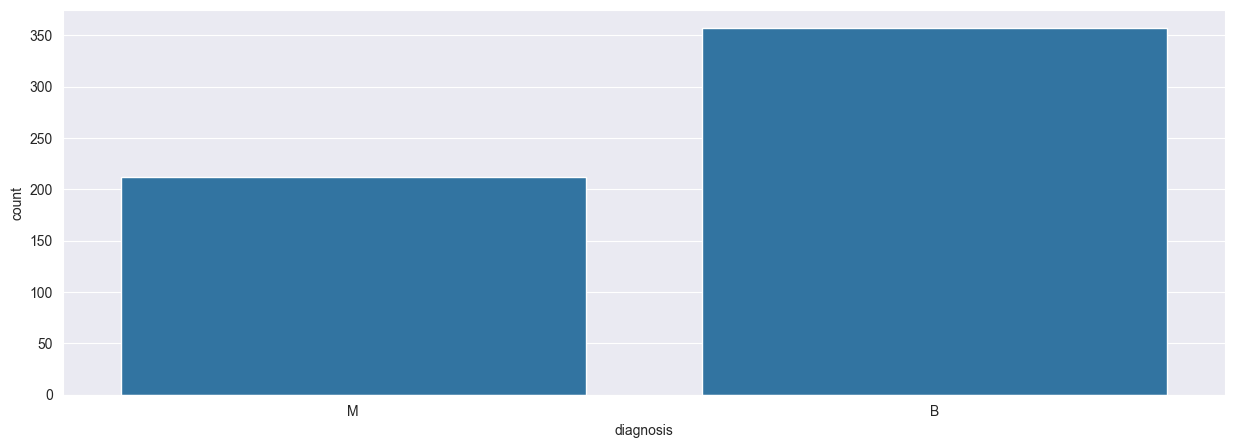

In [120]:
sns.countplot(x=breast_cancer_df['diagnosis'])
plt.show()

### Different examples

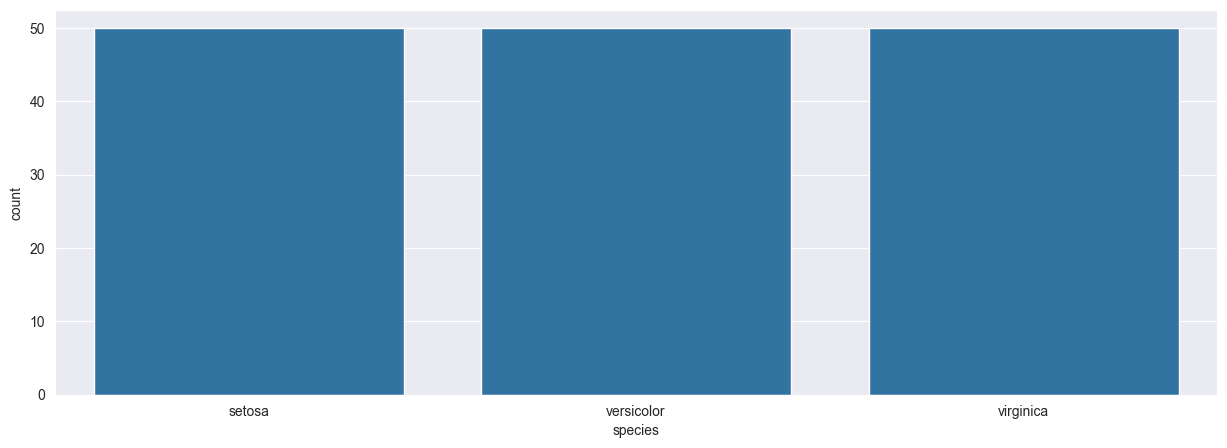

In [121]:
sns.countplot(x=iris_df['species'])
plt.show()

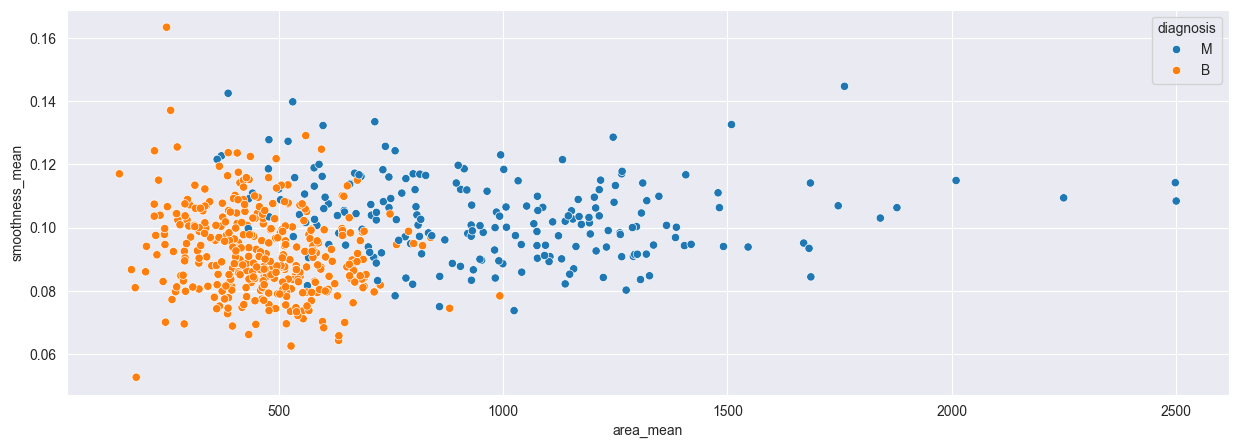

In [122]:
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = breast_cancer_df)
plt.show()

### Different examples

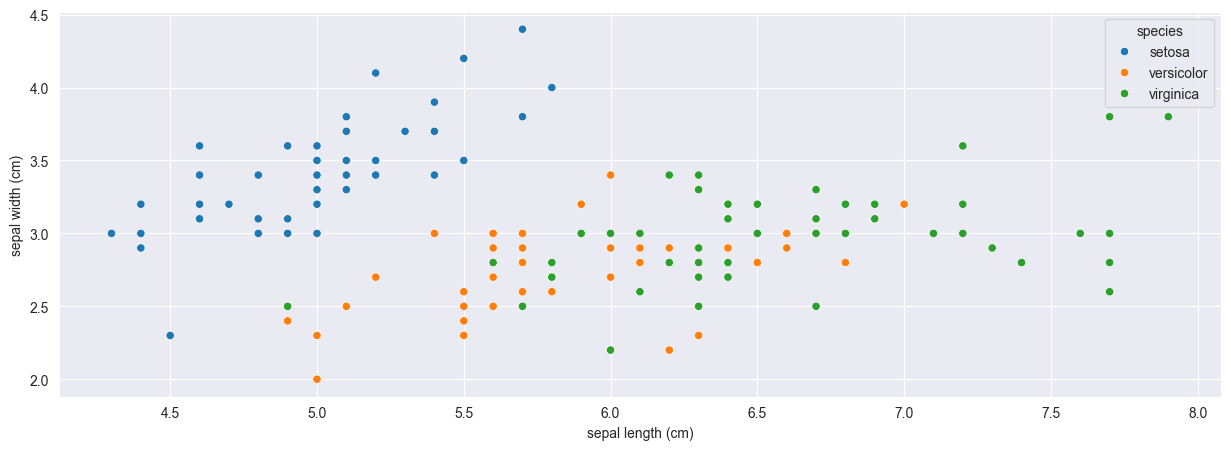

In [123]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=iris_df)
plt.show()

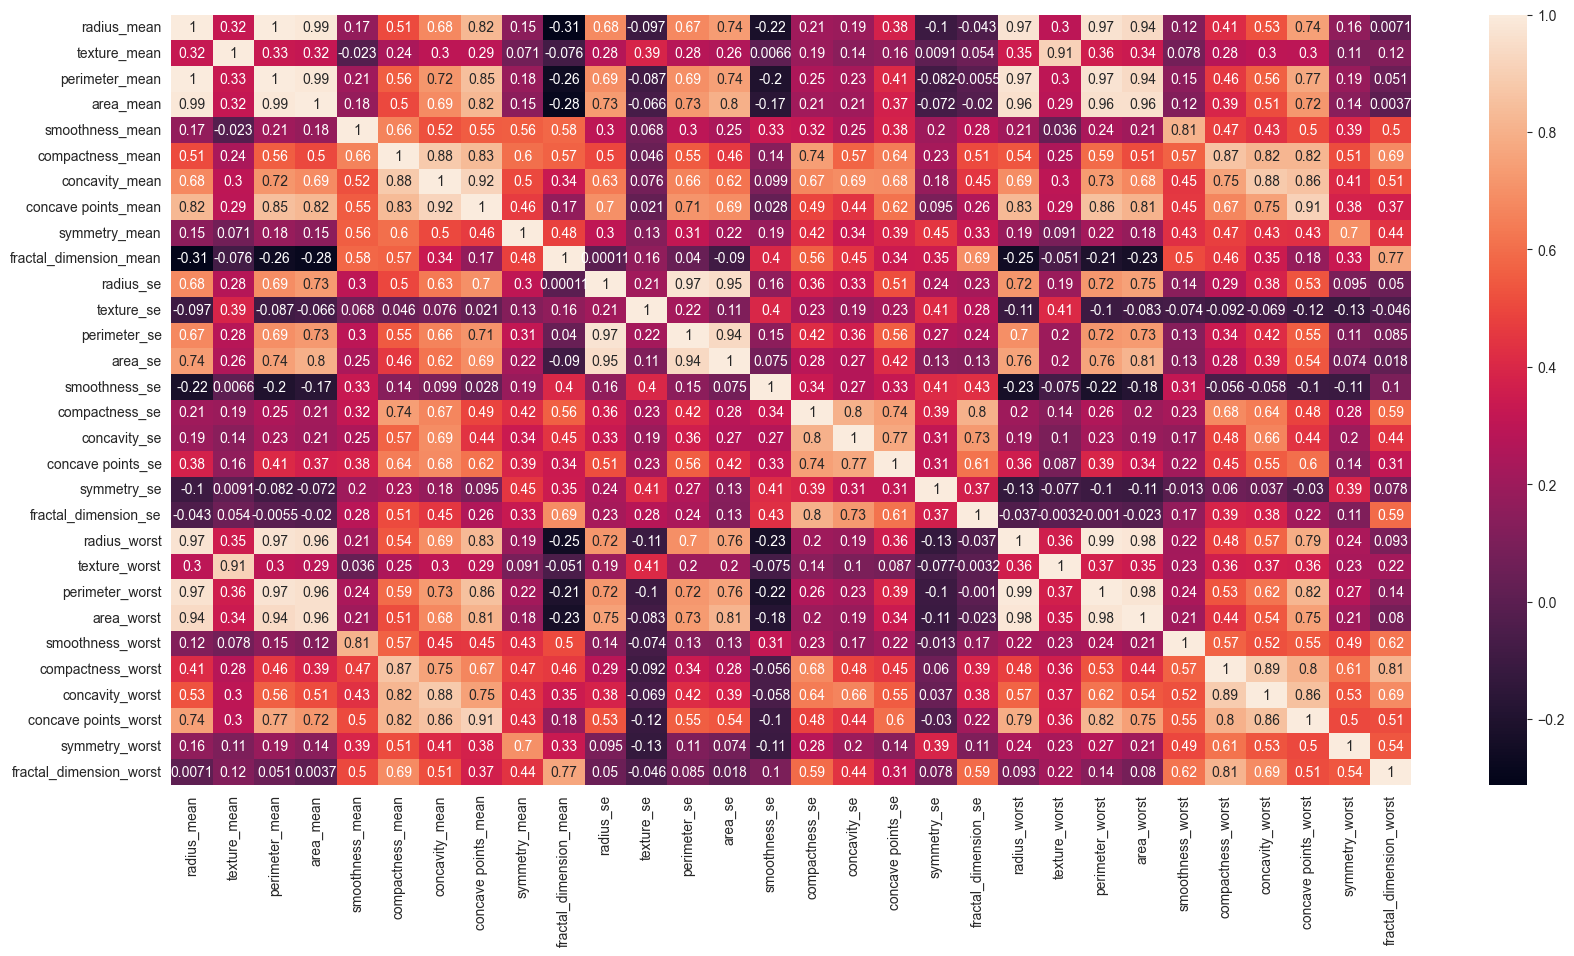

In [124]:
plt.figure(figsize=(20,10))
sns.heatmap(breast_cancer_df.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

### Different examples

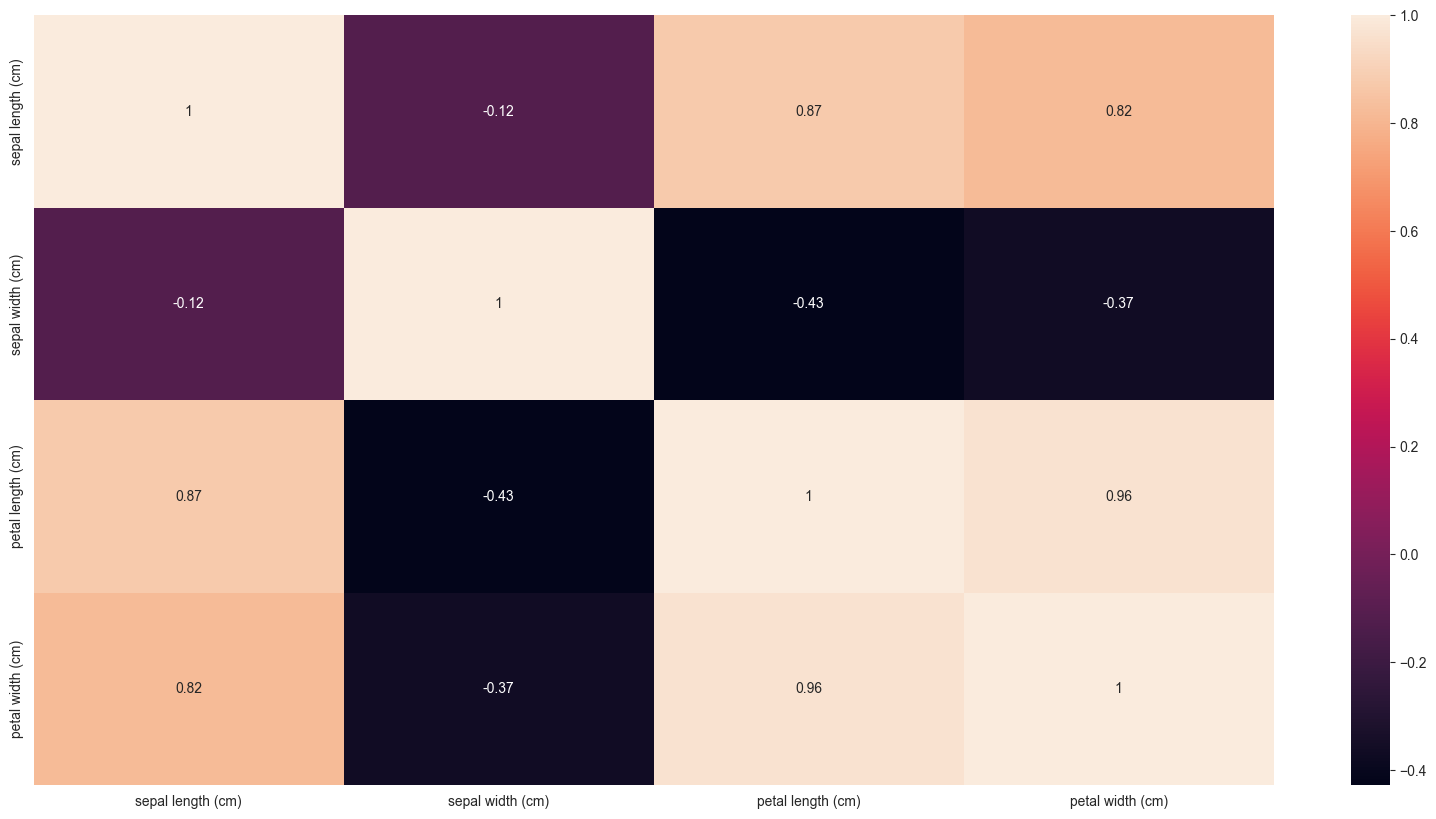

In [125]:
plt.figure(figsize=(20,10))
sns.heatmap(iris_df.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

In [126]:
from sklearn.preprocessing import StandardScaler
# all columns except 'Outcome'
X = breast_cancer_df.drop('diagnosis', axis=1)
y = breast_cancer_df['diagnosis']
# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [127]:
X.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0     1.097064     -2.073335  ...        2.750622                 1.937015
1     1.829821     -0.353632  ...       -0.243890                 0.281190
2     1.579888      0.456187  ...        1.152255                 0.201391
3    -0.768909      0.253732  ...        6.046041                 4.935010
4     1.750297     -1.151816  ...       -0.868353                -0.397100

[5 rows x 30 columns]

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [129]:
from sklearn.svm import SVC
# instantiate the model with default parameters
model = SVC()
# fit/train
model.fit(X_train,y_train)

SVC()

In [130]:
predictions = model.predict(X_test)

In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[104   1]
 [  3  63]]

True Positives(TP) =  104

True Negatives(TN) =  63

False Positives(FP) =  1

False Negatives(FN) =  3


In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98       105
           M       0.98      0.95      0.97        66

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



In [133]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [134]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [135]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.949 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [136]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [137]:
grid_predictions = grid.predict(X_test)

In [138]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[105   0]
 [  2  64]]
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       105
           M       1.00      0.97      0.98        66

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



### Different examples using the irris dataset

In [139]:
# Prepare data for training
X = iris_df.drop('species', axis=1)
y = iris_df['species']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [140]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [141]:
# Train SVM model
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [142]:
# Evaluate model
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print(classification_report(y_test, predictions))

Confusion matrix

 [[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]

True Positives(TP) =  13

True Negatives(TN) =  19

False Positives(FP) =  0

False Negatives(FN) =  0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [143]:
# Hyperparameter tuning
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.333 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [144]:
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [145]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

